In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


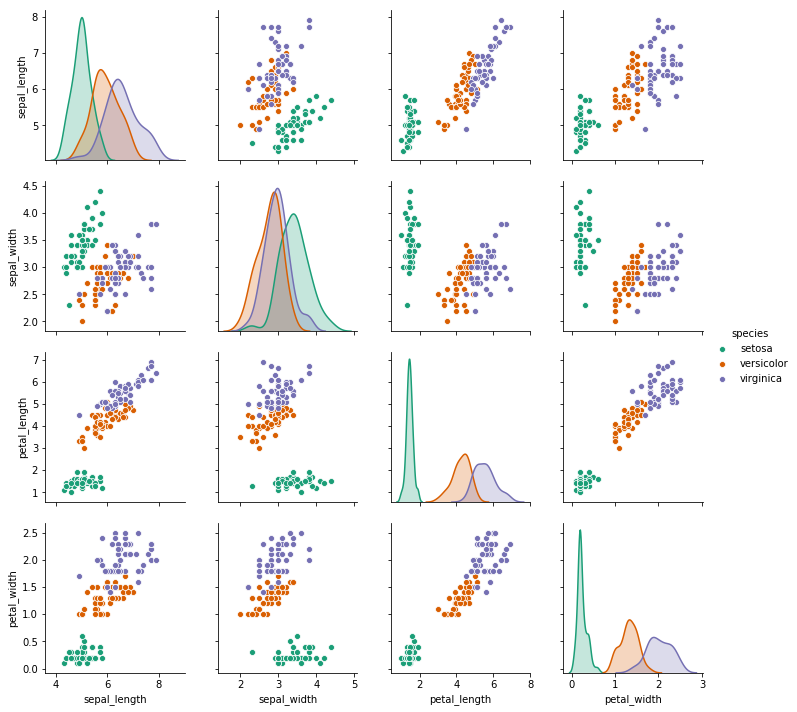

In [6]:
sns.pairplot(iris,hue='species',palette='Dark2')

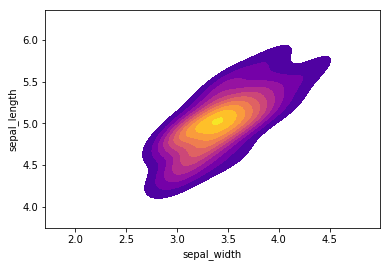

In [7]:
setosa=iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'],setosa['sepal_length'],cmap='plasma',shade=True,
           shade_lowest=False)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
#Call the SVC() model from sklearn and fit the model to the training data
from sklearn.svm import SVC

In [11]:
svc_model =SVC()

In [12]:
svc_model.fit(X_train,y_train)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
predictions = svc_model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [19]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [20]:
grid.fit(X_train,y_train)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9166666666666666, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9142857142857143, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8823529411764706, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..................... C=0.1, gamma=0.1, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7714285714285715, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7647058823529411, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[CV] ........ C=1000, gamma=1, score=0.9142857142857143, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.9444444444444444, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.9142857142857143, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................... C=1000, gamma=0.01, score=1.0, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.9142857142857143, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [21]:
grid_predictions = grid.predict(X_test)

In [22]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

